# Markov Chain Monte Carlo (MCMC) Sampling: 
---
[Toward Data Science: Monte Carlo Markov Chain (MCMC), Exlplained](https://towardsdatascience.com/monte-carlo-markov-chain-mcmc-explained-94e3a6c8de11)
- about drawing samples from a given distribution: *estimating using randomness*
- **Independent Samples:** averages over samples can be used as unbiased estimators of expected values of parameters in the distribtuion 
    - *Discrete Samples:*
        - *law of large numbers:* growing sample base, fraction of an instance corresponds to its probability 
    - *Continuous Samples:*
        - analogous reasoning applies to a given region of the sample space 
- **Practical Challenge:** ensuring independent sampling because the distribution is *unknown*
    - *dependent samples* can still be unbiased (tend to increase estimate's variance)
    - more smples will be needed for a more precise estimate 


#### Sampling from a Multivariate Distribution is Computationally Demanding: number of *states* increases **exponentially** with the number of *dimensions*

#### [Stochastic:](https://en.wikipedia.org/wiki/Stochastic)
- modeling approach for a random probability distribution 
- means "aim" or "guess" in greek
- *Stochastic Process* -> *Random Process*

# Monte Carlo Methods:
---
- Rely on repeated random sampling to approximate results 
- may be determinisitc -> do not permit an exact analytical solution 
- developed during Manhattan Project for the Atomic Bomb

# [Markov Chain:](https://towardsdatascience.com/introduction-to-markov-chains-50da3645a50d) 
---
> #### Dynamic Stochastic Model Describing a Random Walk Over a Set of States Connected By Transition Probabilities 


### Markov Property: 
- process has no memory 
- next step depends only on the current state 
    - aka: dependent on wether the present, past, and future are *independent*
    - information about past states *does not* help to predict the future
        - beyond what we know about the present 
- unable to produce sequences with potential underlying trends 
- lack ability to produce context-dependent content -> cannot take into account full set of prior states 
- *probability the same for every step, technically only in Homogeneous Markov Chains)*

> #### Set of Transitions (determined by a probability distribution) that Satisfy the *Markov Property*
> - Weather Prediction Example: weather *a* turning into weather *b* has the probability *p* of occurring based on past data
>   - assumed the *transition* from *a* to *b* in the process (only two possible states)
>   - probability distribution **only** obtained via transitions from current day to the next -> *memoryless*

### Probabilistic Automaton: 
- *transition matrix* = probability distribution of state transitions 
    - *N* possible states -> *N x N* matrix with entry of *(I,J)* being the probability of transitioning from *I* to *J*
    - must be a **stochastic matrix** -> entries in each row must add up to **1**
    - each row represents its own probability distribution 

### Initial State Vector: 
- a *N x 1* matrix (vector) -> describes probability distribution of starting at each of the *N* possible states
- minimum of two entities for markov chains 

### Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

## Random Walk: 
---

In [2]:
start = 0 
x = []
n = 10000
for i in range(n): 
    step = np.random.choice([-1,1], p=[0.5,0.5])
    start = start+step 
    x.append(start)

In [3]:
def spread(x): 
    top = np.max(x)
    bottom = np.min(x)
    if bottom > 0: 
        drop = (bottom + top) / -4
    else: 
        spread = abs(bottom) + abs(top)
        drop = bottom + spread/-4
    return drop 

In [4]:
drop = spread(x)

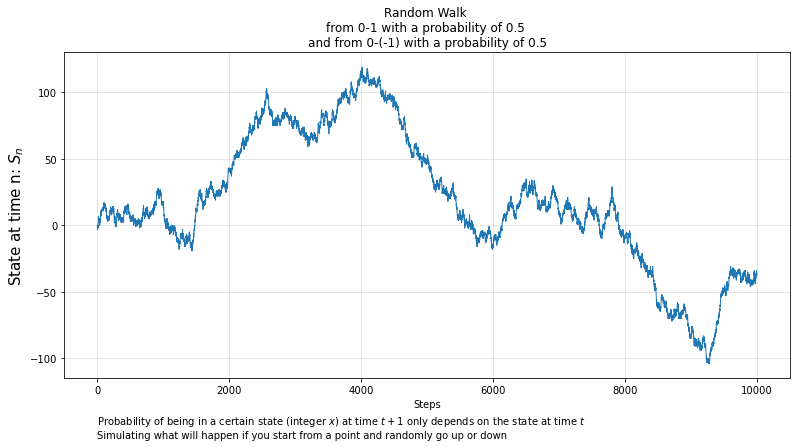

In [5]:
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(x, linewidth=1)
ax.set_xlabel('Steps', fontsize=10)
ax.set_ylabel(r'State at time n: $S_{n}$', fontsize=15)
ax.grid(True, alpha=0.4)
ax.set_title('Random Walk \nfrom 0-1 with a probability of 0.5 \nand from 0-(-1) with a probability of 0.5')
ax.text(0.2, drop, "Probability of being in a certain state (integer $x$) at time $t+1$ only depends on the state at time $t$ \nSimulating what will happen if you start from a point and randomly go up or down")

plt.show()

## Biased Random Walk: 
---

> #### Probability of Going **Up** is *Not* the Same Probability of Going **Down**

In [6]:
x = []
p = [[0.5,0.5],[0.9,0.1],[0.8,0.2],[0.6,0.4],[0.4,0.6],[0.2,0.8],[0.1,0.9]]
p_label = ['Simple', r'$p=0.9$', r'$p=0.8$', r'$p=0.6$', r'$p=0.4$', r'$p=0.2$', r'$p=0.1$']
n = 10000

for couple in p: 
    x_p = []
    start = 0
    for i in range(n): 
        step = np.random.choice([-1,1],p=couple)
        start = start + step
        x_p.append(start)
    x.append(x_p)


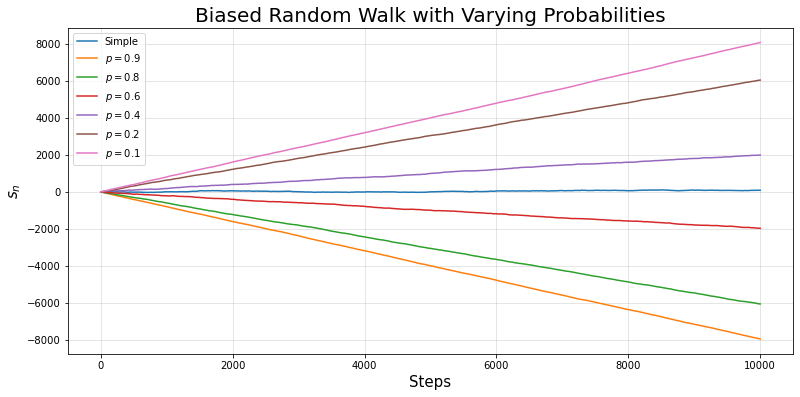

In [7]:
fig, ax = plt.subplots(figsize=(13,6))

i = 0
for time_series in x: 
    ax.plot(time_series,label=p_label[i])
    i = i + 1

ax.set_xlabel('Steps', fontsize=15)
ax.set_ylabel(r'$s_{n}$', fontsize=15)
ax.legend()
ax.grid(True, alpha=0.4)
ax.set_title("Biased Random Walk with Varying Probabilities", fontsize=20)
plt.show()

## Gambler's Ruin Chain
---